# Club Football Match (2000 - 2025) EDA and Feature Engineering

**Dataset Link: https://www.kaggle.com/datasets/adamgbor/club-football-match-data-2000-2025**

*This dataset offers a simple entrance to the world of football match data analysis. It offers football match data from 27 countries and 42 leagues worldwide, including some of the best leagues such as the English Premier League, German Bundesliga, and Spanish La Liga. The data spans from the 2000/01 season to the most recent results from the 2024/25 season. The dataset also includes Elo Ratings for the given time period with snapshots of ~500 of the best teams in Europe taken twice a month, on the 1st and 15th.*

## Importing and Reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [2]:
# reading CSV files

matches = pd.read_csv("Matches.csv", low_memory=False)
eloRatings = pd.read_csv("EloRatings.csv")

In [3]:
matches.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.4,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226755 entries, 0 to 226754
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     226755 non-null  object 
 1   MatchDate    226755 non-null  object 
 2   MatchTime    95270 non-null   object 
 3   HomeTeam     226755 non-null  object 
 4   AwayTeam     226755 non-null  object 
 5   HomeElo      148272 non-null  float64
 6   AwayElo      148233 non-null  float64
 7   Form3Home    225255 non-null  float64
 8   Form5Home    225255 non-null  float64
 9   Form3Away    226755 non-null  int64  
 10  Form5Away    226755 non-null  int64  
 11  FTHome       226752 non-null  float64
 12  FTAway       226752 non-null  float64
 13  FTResult     226752 non-null  object 
 14  HTHome       172175 non-null  float64
 15  HTAway       172175 non-null  float64
 16  HTResult     172175 non-null  object 
 17  HomeShots    110933 non-null  float64
 18  AwayShots    110936 non-

In [5]:
print(matches.shape, eloRatings.shape)

(226755, 42) (240556, 4)


In [6]:
matches.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway'],
      dtype='object')

In [7]:
# eloRatings DF

eloRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240556 entries, 0 to 240555
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     240556 non-null  object 
 1   club     240556 non-null  object 
 2   country  240556 non-null  object 
 3   elo      240556 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.3+ MB


In [8]:
eloRatings.head()

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43


## Data Cleaning and Preparing

In [9]:
# First I will delete all columns of matches DF related to betting, also unnecessary columns then I will check
# for missing values
# Matches Dataframe
columns_to_delete = ['OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway','MatchTime']

In [10]:
matches.drop(columns=columns_to_delete, inplace=True)

In [11]:
matches.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo',
       'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed'],
      dtype='object')

In [12]:
matches["MatchDate"] = pd.to_datetime(matches["MatchDate"], errors='coerce')

In [13]:
# Checking for null values
matches.isnull().mean()

Division       0.000000
MatchDate      0.000000
HomeTeam       0.000000
AwayTeam       0.000000
HomeElo        0.346114
AwayElo        0.346286
Form3Home      0.006615
Form5Home      0.006615
Form3Away      0.000000
Form5Away      0.000000
FTHome         0.000013
FTAway         0.000013
FTResult       0.000013
HTHome         0.240700
HTAway         0.240700
HTResult       0.240700
HomeShots      0.510780
AwayShots      0.510767
HomeTarget     0.514335
AwayTarget     0.514322
HomeFouls      0.514141
AwayFouls      0.514141
HomeCorners    0.512421
AwayCorners    0.512421
HomeYellow     0.490657
AwayYellow     0.490653
HomeRed        0.490653
AwayRed        0.490662
dtype: float64

Columns like ['HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
             'AwayCorners'] have more 50% of missing values.

In [14]:
# checking for Eloratings

eloRatings.isnull().mean()

date       0.0
club       0.0
country    0.0
elo        0.0
dtype: float64

In [15]:
# No missing values in eloratings

In [16]:
eloRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240556 entries, 0 to 240555
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     240556 non-null  object 
 1   club     240556 non-null  object 
 2   country  240556 non-null  object 
 3   elo      240556 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.3+ MB


In [17]:
# change the dtype of date column
eloRatings['date'] = pd.to_datetime(eloRatings['date'], errors='coerce')
eloRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240556 entries, 0 to 240555
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     240556 non-null  datetime64[ns]
 1   club     240556 non-null  object        
 2   country  240556 non-null  object        
 3   elo      240556 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.3+ MB


In [18]:
#
matches[~matches['HomeShots'].isnull()]

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
39,D1,2000-08-11,Dortmund,Hansa Rostock,1653.11,1627.64,0.0,0.0,0,0,1.0,0.0,H,0.0,0.0,D,17.0,5.0,7.0,2.0,25.0,19.0,7.0,3.0,1.0,5.0,0.0,0.0
42,D1,2000-08-12,Bayern Munich,Hertha,1872.44,1660.92,0.0,0.0,0,0,4.0,1.0,H,1.0,0.0,H,14.0,11.0,6.0,5.0,13.0,12.0,4.0,9.0,1.0,0.0,0.0,0.0
43,D1,2000-08-12,Freiburg,Stuttgart,1632.55,1639.04,0.0,0.0,0,0,4.0,0.0,H,2.0,0.0,H,15.0,18.0,7.0,5.0,22.0,17.0,4.0,7.0,1.0,1.0,0.0,0.0
44,D1,2000-08-12,Hamburg,Munich 1860,1717.81,1676.89,0.0,0.0,0,0,2.0,2.0,D,2.0,2.0,D,18.0,9.0,5.0,7.0,0.0,0.0,5.0,3.0,2.0,2.0,0.0,1.0
45,D1,2000-08-12,Kaiserslautern,Bochum,1659.47,1600.54,0.0,0.0,0,0,0.0,1.0,A,0.0,0.0,D,11.0,5.0,2.0,2.0,9.0,8.0,5.0,5.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226750,P1,2024-12-23,Benfica,Estoril,1800.44,1425.01,7.0,13.0,4,5,3.0,0.0,H,1.0,0.0,H,15.0,10.0,6.0,2.0,11.0,13.0,4.0,1.0,1.0,1.0,0.0,0.0
226751,P1,2024-12-23,Guimaraes,Nacional,1603.84,1387.77,4.0,7.0,3,4,2.0,2.0,D,1.0,1.0,D,16.0,8.0,3.0,2.0,15.0,11.0,7.0,1.0,1.0,1.0,0.0,0.0
226752,I1,2024-12-23,Inter,Como,1977.06,1560.80,9.0,13.0,5,6,2.0,0.0,H,0.0,0.0,D,17.0,8.0,5.0,4.0,13.0,15.0,7.0,1.0,2.0,2.0,0.0,0.0
226753,E2,2024-12-23,Crawley Town,Birmingham,NaN,1406.69,6.0,8.0,9,12,0.0,1.0,A,0.0,0.0,D,5.0,12.0,0.0,4.0,11.0,15.0,3.0,6.0,1.0,1.0,0.0,0.0


## EDA

## Eloratings
**The World Football Elo Ratings are a ranking system for men's national association football teams that is published by the website eloratings.net. It is based on the Elo rating system but includes modifications to take various football-specific variables into account, like the margin of victory, importance of a match, and home field advantage. Other implementations of the Elo rating system are possible and there is no single nor any official Elo ranking for football teams.**

In [19]:
eloRatings.head()

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43


In [20]:
eloRatings.country.unique()

array(['GER', 'DEN', 'BEL', 'SCO', 'TUR', 'GRE', 'SWE', 'FRA', 'NED',
       'RUS', 'ESP', 'POR', 'ITA', 'POL', 'ROM', 'ENG', 'AUT', 'NOR',
       'FIN'], dtype=object)

In [21]:
eloRatings.club.nunique()

893

In [22]:
# Getting the latest eloratings of year 2024
elo_24 = eloRatings[eloRatings['date'].dt.year == 2024]
elo_24.head()
# eloRatings.groupby('club')['elo'].mean().reset_index().head(20)

,date,club,country,elo
230768,2024-01-01,Aalesund,NOR,1199.90
230769,2024-01-01,Aarhus,DEN,1531.45
230770,2024-01-01,Aberdeen,SCO,1344.33
230771,2024-01-01,Ad. Demirspor,TUR,1532.99
230772,2024-01-01,AEK,GRE,1543.63


In [23]:
# sort the elo_24 DF with latest/newest dates so I can capture the latest club once only
elo_24 = elo_24.sort_values(by='date', ascending=False)

# Create a new DataFrame with unique clubs and their latest elo ratings
unique_clubs = pd.DataFrame(columns=['club', 'elo','country'])

for index, row in elo_24.iterrows():
    club = row['club']
    elo = row['elo']
    country = row['country']

    if club not in unique_clubs['club'].values:
        unique_clubs = pd.concat([unique_clubs, pd.DataFrame({'club': [club], 'elo': [elo], 'country':[country]})], ignore_index=True)
    else:
        continue

unique_clubs.shape        

(458, 3)

### Top 30 clubs with latest EloRatings 2024

              club      elo country
349      Liverpool  1991.39     ENG
77           Inter  1977.06     ITA
128        Arsenal  1975.82     ENG
358       Man City  1966.65     ENG
231    Real Madrid  1947.47     ESP
106       Atalanta  1920.13     ITA
104      Barcelona  1919.52     ESP
346     Leverkusen  1903.22     GER
118  Bayern Munich  1898.07     GER
159        Chelsea  1896.25     ENG
362       Paris SG  1886.72     FRA
56        Juventus  1860.19     ITA
108     Ath Madrid  1852.69     ESP
319          Milan  1842.91     ITA
205          Lazio  1838.68     ITA
359         Napoli  1828.78     ITA
215      Sp Lisbon  1827.28     POR
347          Lille  1815.86     FRA
154       Dortmund  1815.27     GER
291      Tottenham  1812.92     ENG
25      Fiorentina  1811.56     ITA
382      Newcastle  1809.88     ENG
373  PSV Eindhoven  1807.97     NED
107     Ath Bilbao  1806.92     ESP
105    Aston Villa  1803.11     ENG
120        Benfica  1800.44     POR
310     Man United  1785.76 

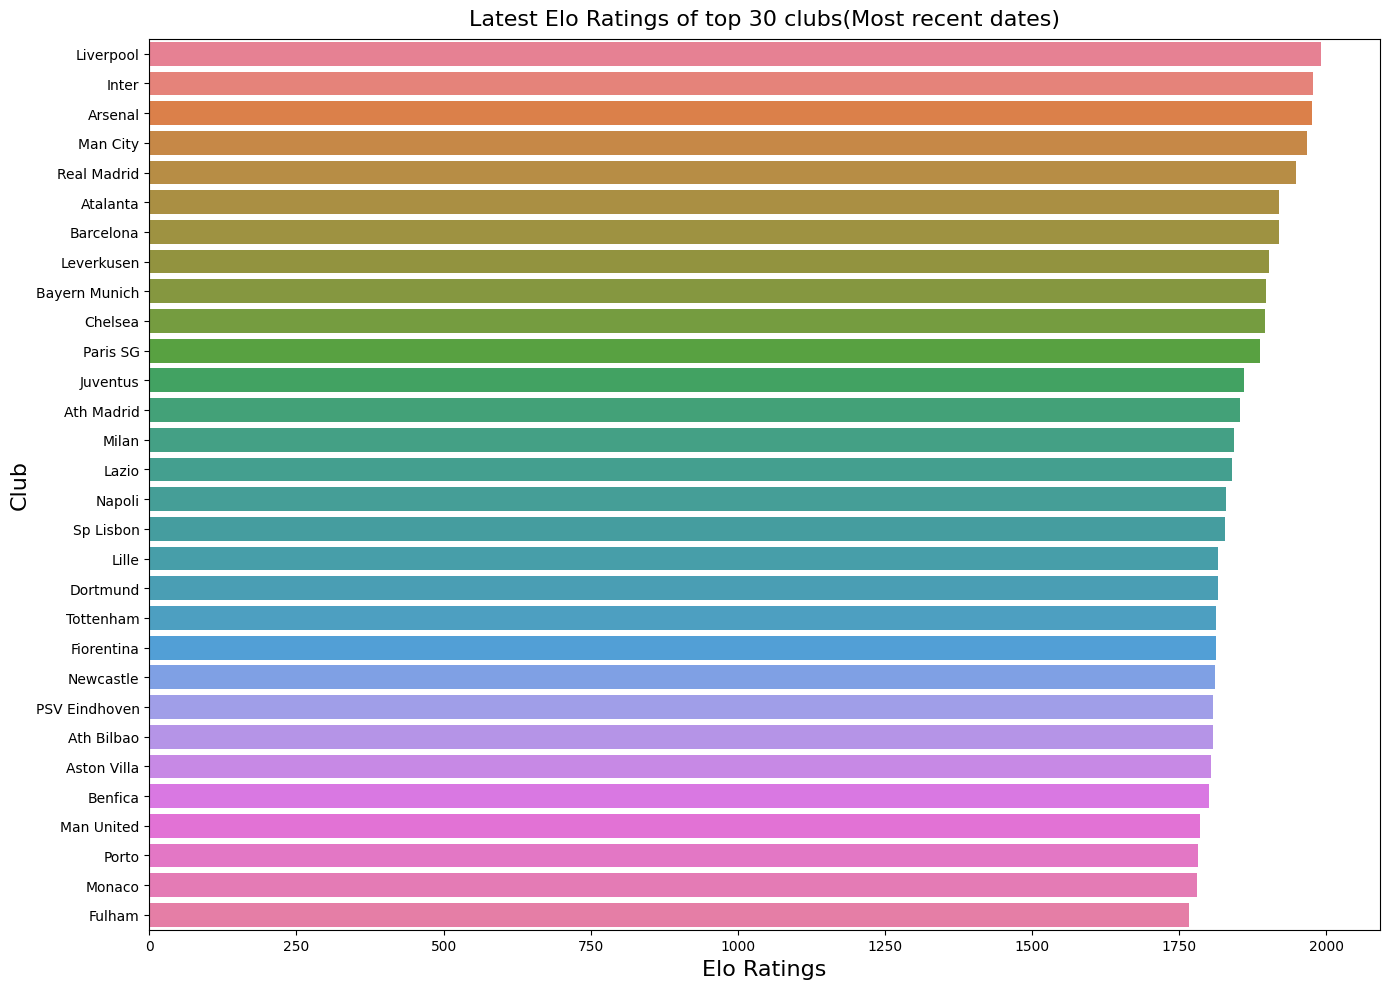

In [24]:
# Top 30 CLubs as per the latest Elo ratings 2024
unique_clubs30 = unique_clubs.sort_values(by='elo', ascending=False).head(30)
print(unique_clubs30)
plt.figure(figsize=(14, 10))
sb.barplot(data=unique_clubs30, x='elo', y='club', orient='h', hue='club')
plt.xlabel("Elo Ratings", fontdict={'fontsize': 16})
plt.ylabel("Club", fontdict={'fontsize': 16})
plt.title("Latest Elo Ratings of top 30 clubs(Most recent dates)", fontdict={'fontsize':16},pad='10')
plt.tight_layout()
plt.show()

### Average ELoRatings of top 15 Clubs

             club          elo
0       Barcelona  1962.251156
1     Real Madrid  1956.433333
2   Bayern Munich  1923.901803
3      Man United  1888.685000
4         Chelsea  1878.964847
5       Liverpool  1872.495289
6         Arsenal  1870.283180
7        Juventus  1852.765204
8        Man City  1835.873350
9      Ath Madrid  1831.624252
10          Inter  1802.510255
11       Valencia  1800.576735
12          Porto  1798.326565
13       Dortmund  1793.575969
14          Milan  1791.101105


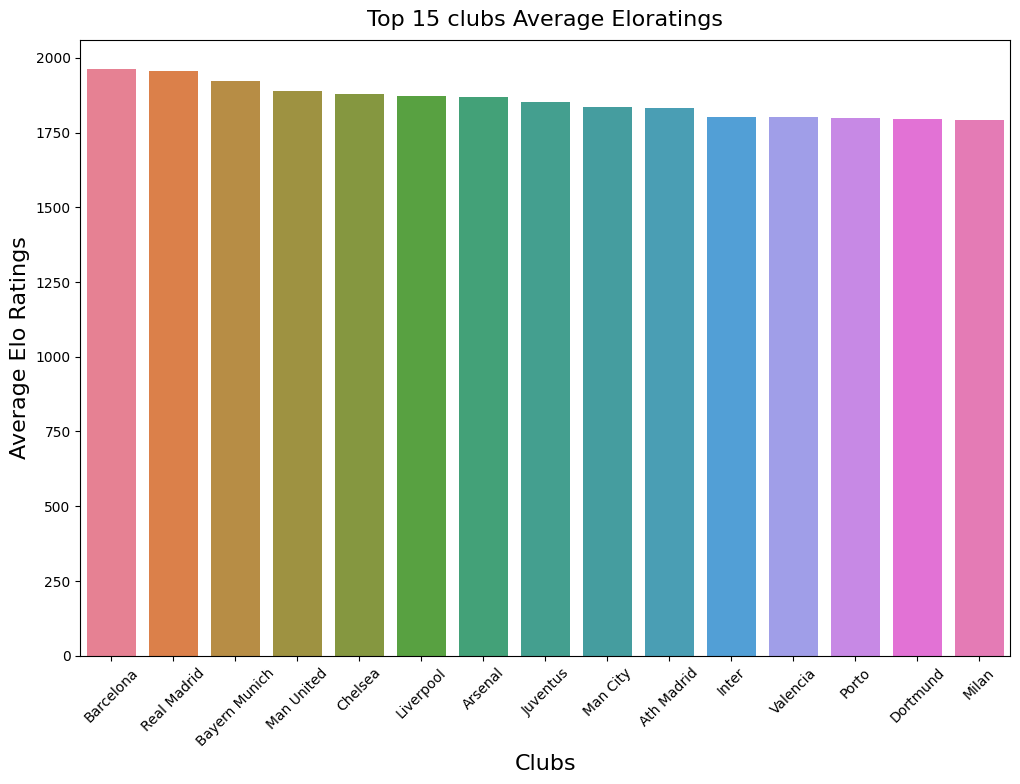

In [25]:
# Average Eloratings of top 15 clubs
elo_avg_clubs = eloRatings.groupby('club')['elo'].mean().sort_values(ascending=False).reset_index()
print(elo_avg_clubs.head(15))
plt.figure(figsize=(12, 8))
sb.barplot(data=elo_avg_clubs.head(15), x='club', y='elo', hue='club')
plt.xlabel("Clubs", fontdict={'fontsize': 16})
plt.ylabel("Average Elo Ratings", fontdict={'fontsize': 16})
plt.xticks(rotation=45)
plt.title("Top 15 clubs Average Eloratings", fontdict={'fontsize':16},pad='10')
plt.show()

### Top 15 Countries with Average EloRatings

   country          elo
0      ESP  1643.631849
1      ENG  1596.407745
2      GER  1582.698852
3      ITA  1553.130912
4      FRA  1543.574262
5      POR  1519.778283
6      RUS  1515.864793
7      NED  1487.867696
8      TUR  1471.378682
9      BEL  1458.889859
10     AUT  1452.534385
11     DEN  1415.283432
12     GRE  1413.441556
13     NOR  1375.370573
14     ROM  1371.705557


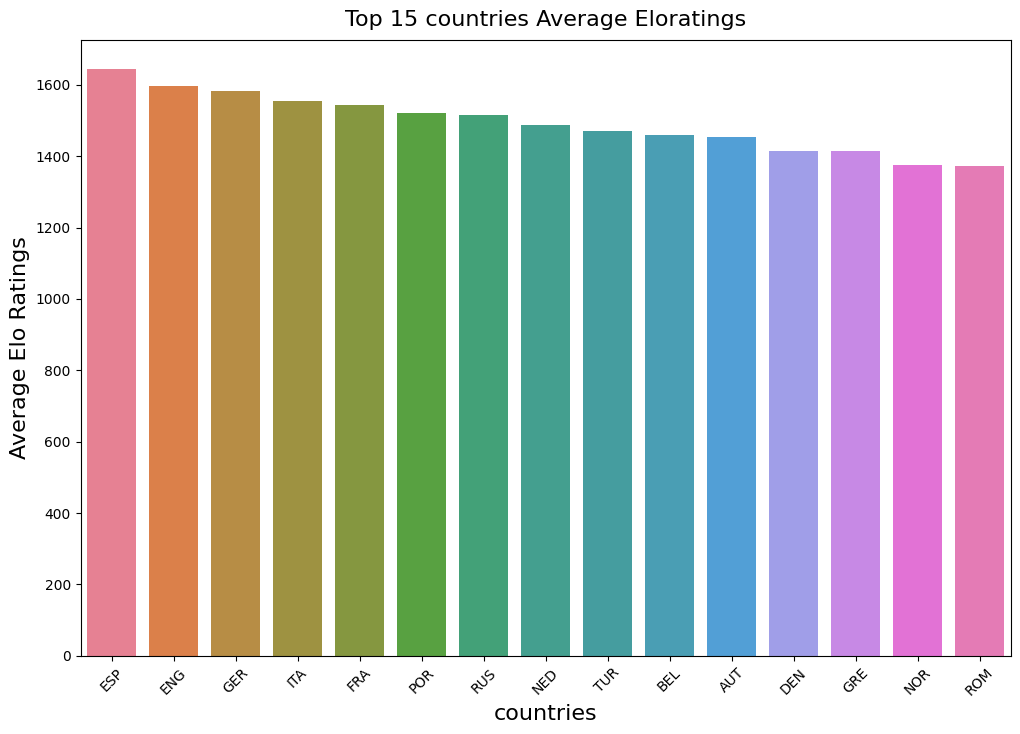

In [26]:
# Top 15 countries with average eloratings

elo_avg_country = eloRatings.groupby('country')['elo'].mean().sort_values(ascending=False).reset_index()
print(elo_avg_country.head(15))
plt.figure(figsize=(12, 8))
sb.barplot(data=elo_avg_country.head(15), x='country', y='elo', hue='country')
plt.xlabel("countries", fontdict={'fontsize': 16})
plt.ylabel("Average Elo Ratings", fontdict={'fontsize': 16})
plt.xticks(rotation=45)
plt.title("Top 15 countries Average Eloratings", fontdict={'fontsize':16},pad='10')
plt.show()

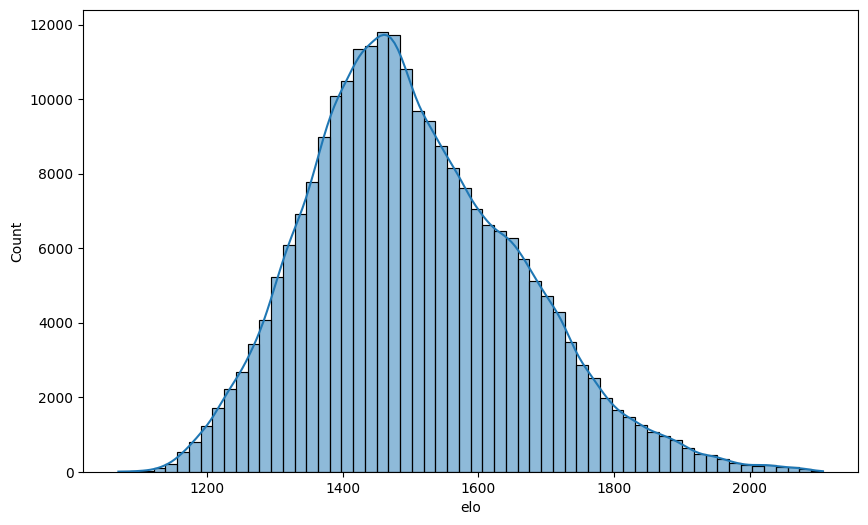

In [27]:
plt.figure(figsize=(10, 6))
sb.histplot(data=eloRatings, x='elo', bins=60, kde=True)
plt.show()

# seems like normal distribution

In [28]:
eloRatings.head(3)

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53


### Average Eloratings of all clubs over time

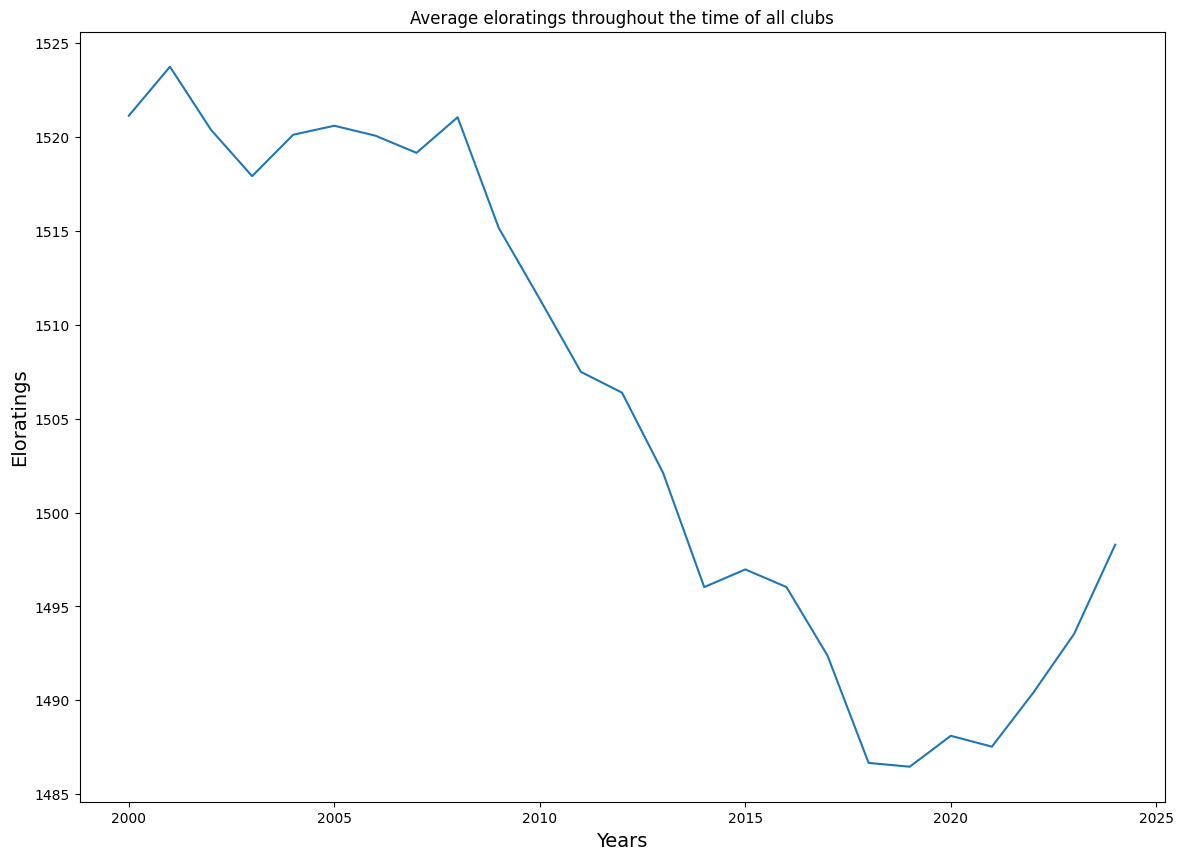

In [29]:
# Avg Elo ratings throughout the time

eloRatings['year'] = eloRatings['date'].dt.year
avg_elo = eloRatings.groupby('year')['elo'].mean()
plt.figure(figsize=(14, 10))
sb.lineplot(x=avg_elo.index, y=avg_elo.values)
plt.title("Average eloratings throughout the time of all clubs")
plt.xlabel("Years", fontdict={'fontsize':14})
plt.ylabel("Eloratings", fontdict={'fontsize':14})
plt.show()

### Top clubs Elo Ratings boxplot

['Barcelona', 'Real Madrid', 'Bayern Munich', 'Man United', 'Chelsea', 'Liverpool', 'Arsenal', 'Juventus', 'Man City']


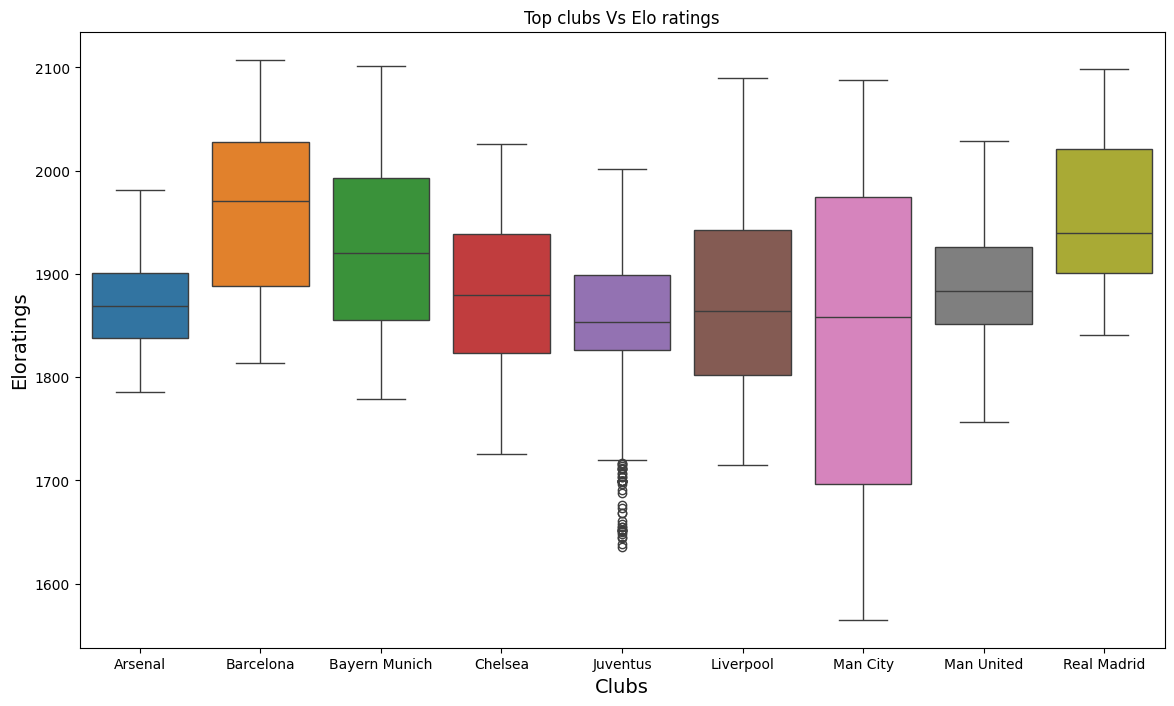

In [30]:
# top club elo ratings 
print(elo_avg_clubs.club[0:9].tolist(), sep='')

plt.figure(figsize=(14, 8))
sb.boxplot(data=eloRatings[eloRatings['club'].isin(elo_avg_clubs.club[0:9].tolist())],
           x='club', y='elo', hue='club')
plt.title("Top clubs Vs Elo ratings")
plt.xlabel("Clubs", fontdict={'fontsize':14})
plt.ylabel("Eloratings", fontdict={'fontsize':14})
plt.show()

### Elratings of top clubs over time

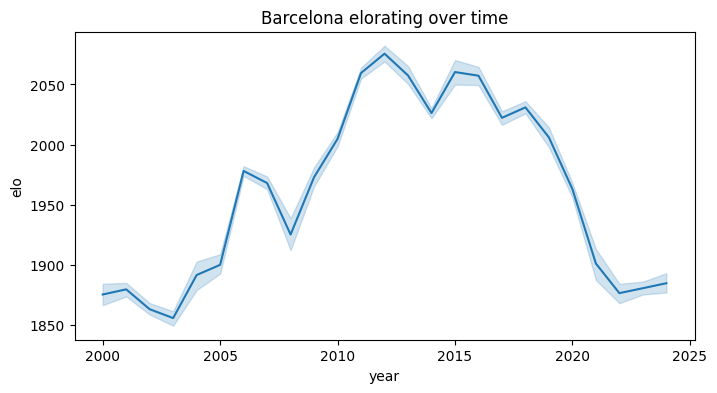

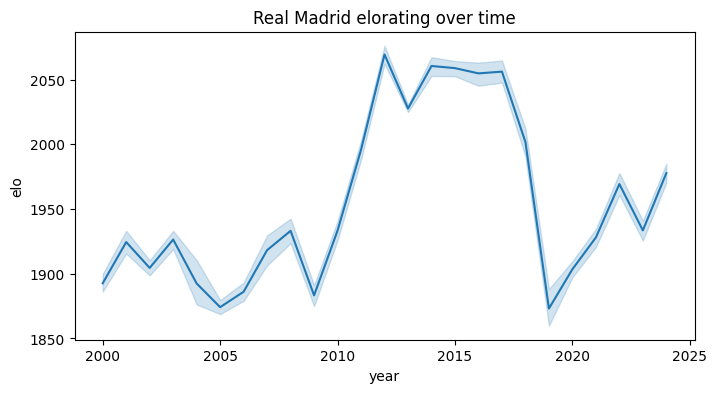

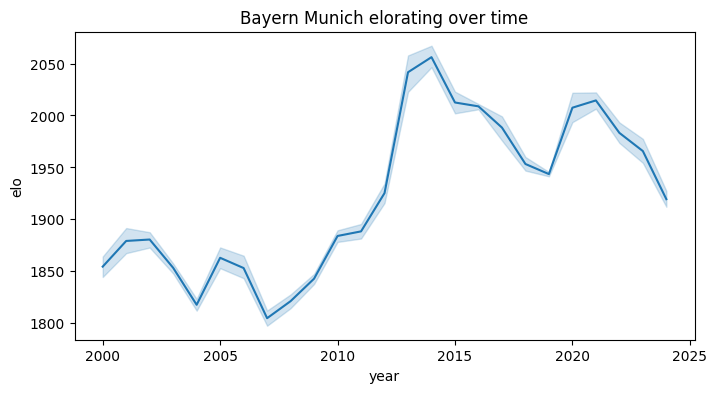

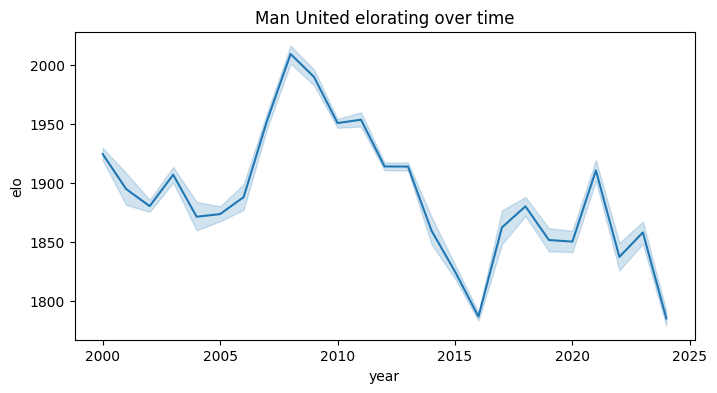

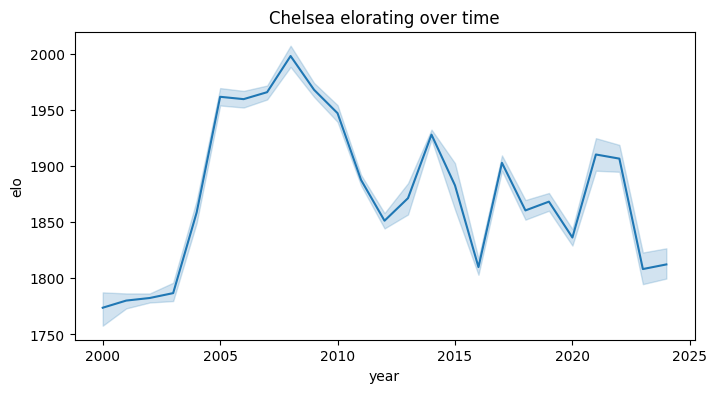

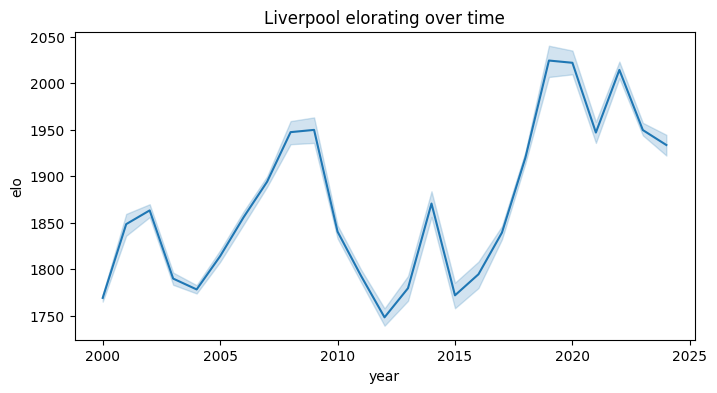

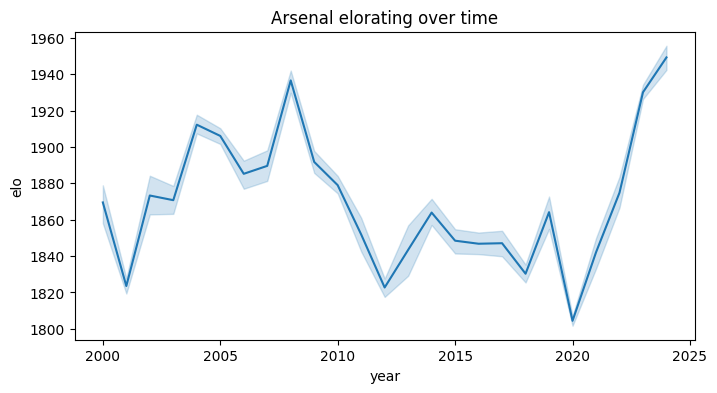

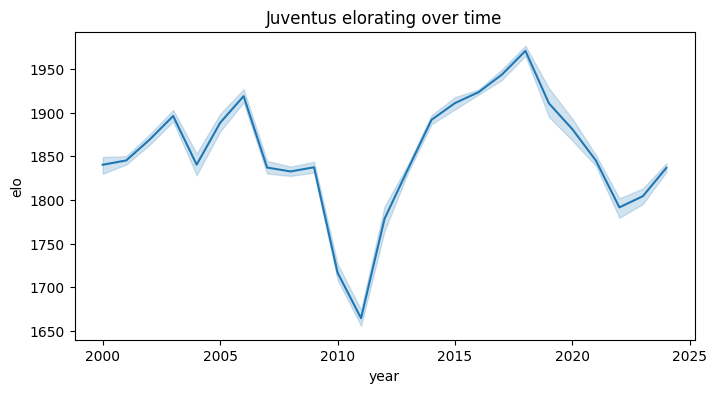

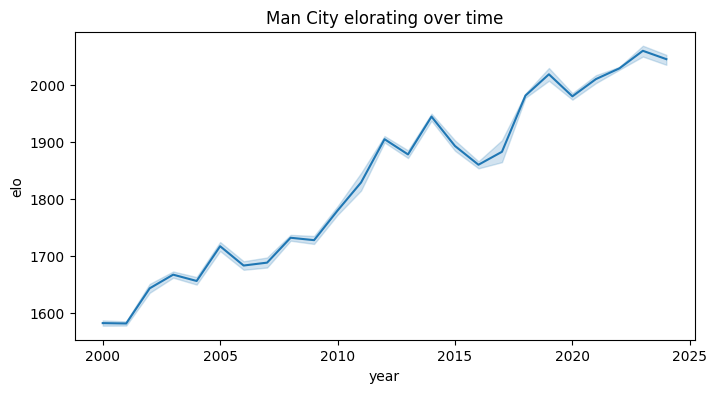

In [31]:
# eloratings of top clubs over time
for i,club in enumerate(elo_avg_clubs.club[0:9].tolist()):
    plt.figure(figsize=(8,4))
    sb.lineplot(data=eloRatings[eloRatings["club"] == club], x="year", y="elo")
    plt.title(club+" elorating over time")

plt.show()

In [32]:
unique_clubs.head()
unique_clubs.shape

(458, 3)

country
ENG    47
ESP    46
ITA    44
FRA    40
GER    39
TUR    23
POL    22
NED    21
POR    21
NOR    19
ROM    19
RUS    19
BEL    18
SWE    18
GRE    16
DEN    14
SCO    13
AUT    13
FIN     6
Name: club, dtype: int64


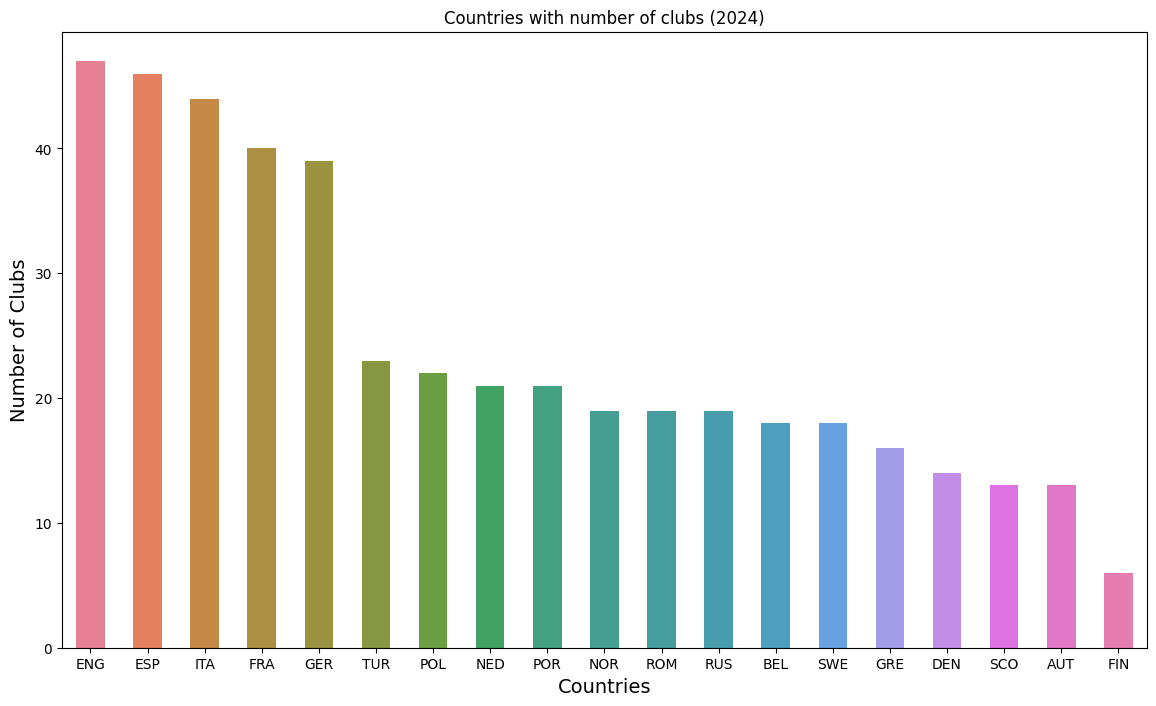

In [33]:
# Countries with Most number of Clubs
# unique clubs only contains the data of year 2024, unique_club is filtered from elo_24 DF

print(unique_clubs.groupby("country")["club"].count().sort_values(ascending=False))
plt.figure(figsize=(14, 8))
sb.barplot(data=unique_clubs.groupby("country")["club"].count().sort_values(ascending=False).reset_index(),
          x="country", y="club", hue="country", width=0.5)
plt.title("Countries with number of clubs (2024)")
plt.xlabel("Countries", fontdict={'fontsize':14})
plt.ylabel("Number of Clubs", fontdict={'fontsize':14})
plt.show()

## Matches EDA

In [34]:
print(matches.shape)
matches.head()

(226755, 28)


,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,F1,2000-07-28,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Home Teams Elo distribution 

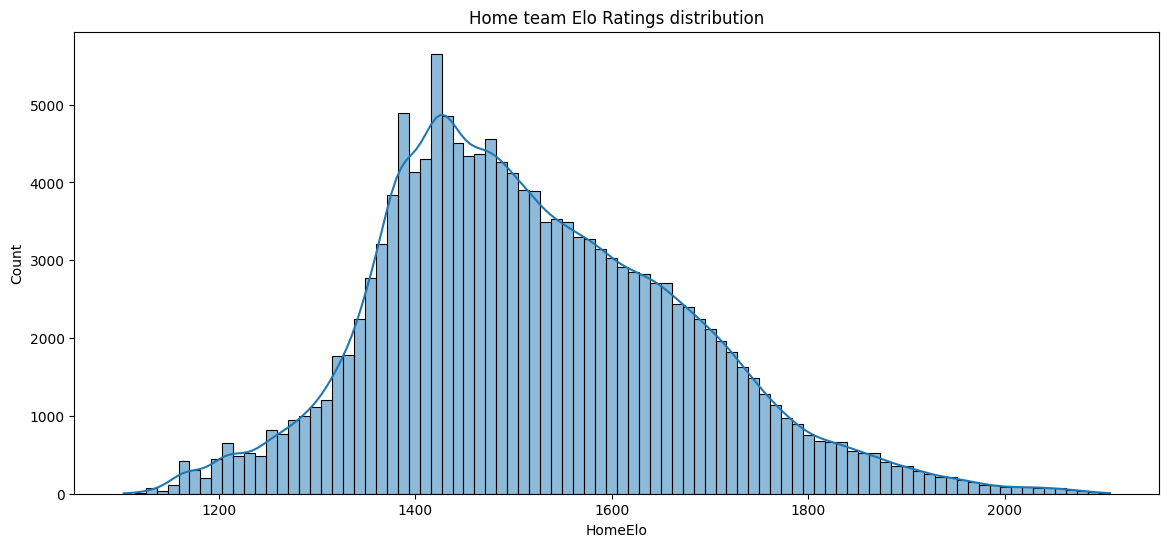

In [35]:
plt.figure(figsize=(14,6))
sb.histplot(data=matches, x="HomeElo", kde=True, bins=90)
plt.title("Home team Elo Ratings distribution")
plt.show()

Observation:

- *The majority of home teams have an average EloRatings ranging from 1400 - 1600*
- *Elo ratings range broadly from 1200 - 2000*
- *Few teams have high Elo ratings (>1800)*
- *slightly skewed to right*

### Away Teams Elo distribution

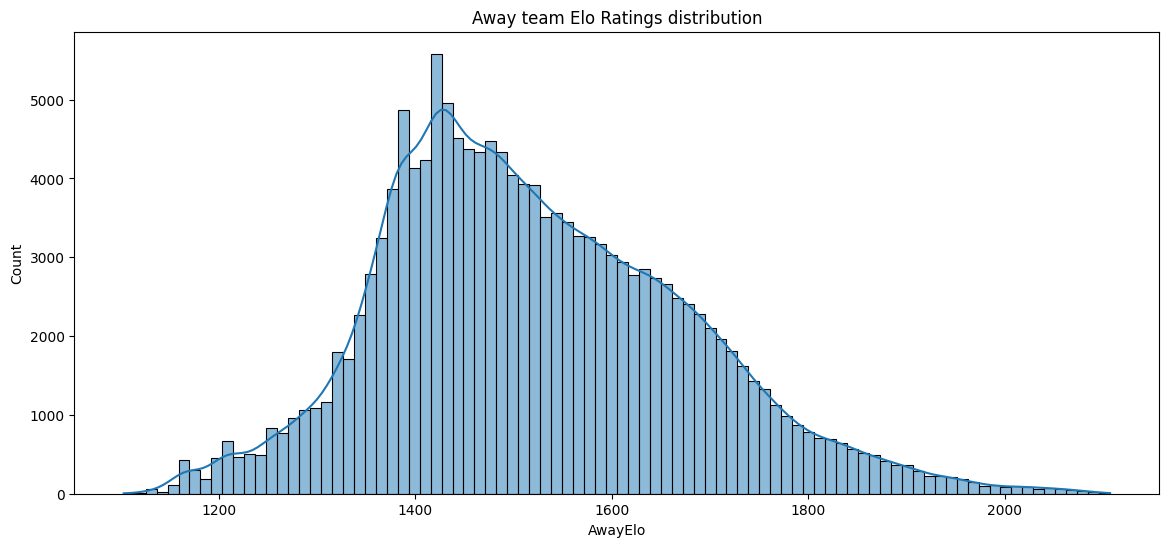

In [36]:
plt.figure(figsize=(14,6))
sb.histplot(data=matches, x="AwayElo", kde=True, bins=90)
plt.title("Away team Elo Ratings distribution")
plt.show()

Observation:

*There's not much difference in observation between the Eloratings of Home and Away teams*

In [37]:
print(f"The unique clubs/teams in DF eloRatings {eloRatings.club.nunique()}")
print(f"The unique countries in DF eloRatings {eloRatings.country.nunique()}")
print(f"The min elorating in DF is {eloRatings.elo.min()}")
print(f"The max elorating in DF is {eloRatings.elo.max()}")
print(f"The Average elorating in DF is {eloRatings.elo.mean()}")

The unique clubs/teams in DF eloRatings 893
The unique countries in DF eloRatings 19
The min elorating in DF is 1069.68
The max elorating in DF is 2107.48
The Average elorating in DF is 1505.1588748150118


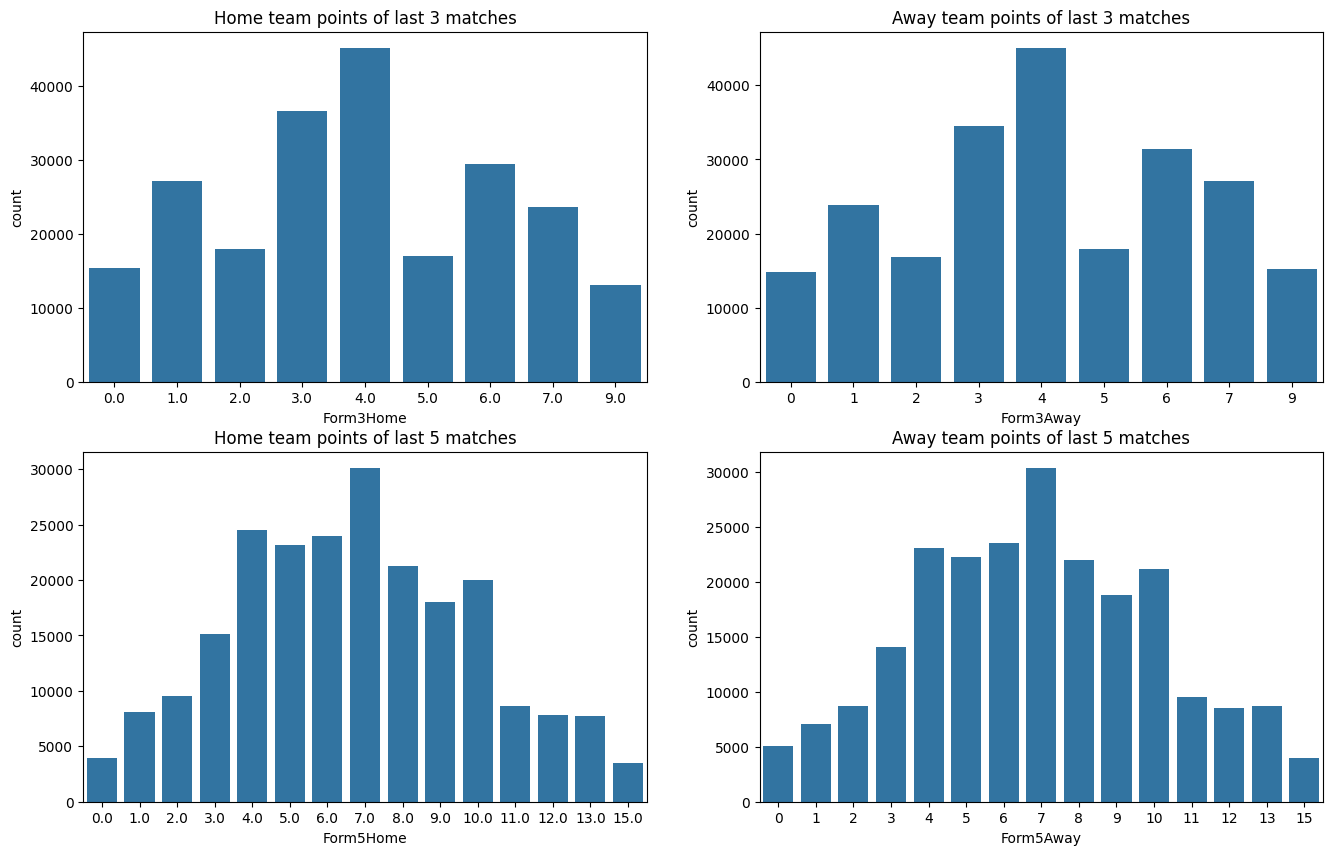

In [38]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sb.countplot(data=matches, x="Form3Home") # plot of last 3 matches home team points
plt.title("Home team points of last 3 matches")
plt.subplot(2,2,2)
sb.countplot(data=matches, x="Form3Away") # plot of last 3 matches away team points
plt.title("Away team points of last 3 matches")
plt.subplot(2,2,3)
sb.countplot(data=matches, x="Form5Home") # plot of last 5 matches home team points
plt.title("Home team points of last 5 matches")
plt.subplot(2,2,4)
sb.countplot(data=matches, x="Form5Away") # plot of last 5 matches away team points
plt.title("Away team points of last 5 matches")
plt.show()

observation:

- **Form3 - last 3 matches (Win = 3 points, Draw = 1 point, Loss = 0 points, so this value is between 0 and 9).**
- **Form5 - last 5 matches (Win = 3 points, Draw = 1 point, Loss = 0 points, so this value is between 0 and 15).**

- Both home and away teams show a similar distribution of points.
- There are fewer teams who all matches earning them 9 points.
- the home and away teams in form3 plot depicts that most of the team won only 1 match with 1 draw point making it 4, then come the team with points 3 either won a single match or all match drawn making it 3, then come the teams with points 6 won 2 matches out of 3 making it 6 and so on.
- The home and away teams in form5 plots depicts that most of the teams either won 2 matches with 1 draw or 1 match with other draws making it 7, and so on.

### Half Time goals

HTHome
0.0    89174
1.0    58864
2.0    19076
3.0     4203
4.0      725
5.0      121
6.0       11
7.0        1
Name: count, dtype: int64
HTAway
0.0    104586
1.0     51823
2.0     13084
3.0      2306
4.0       325
5.0        46
6.0         4
7.0         1
Name: count, dtype: int64


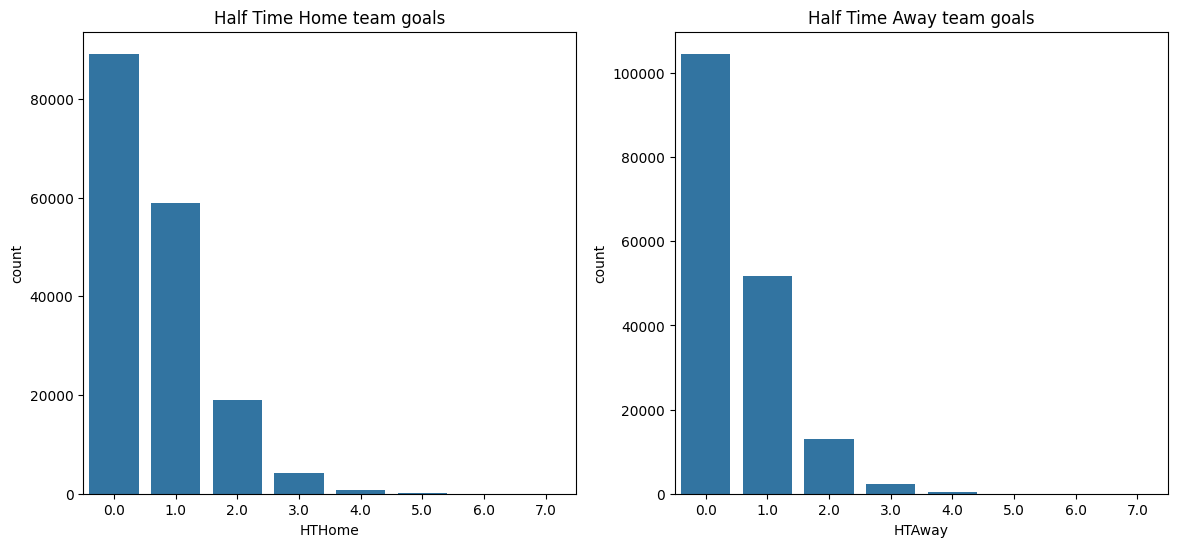

In [39]:
print(matches.HTHome.value_counts())
print(matches.HTAway.value_counts())
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.countplot(data=matches, x="HTHome")
plt.title("Half Time Home team goals")
plt.subplot(1,2,2)
sb.countplot(data=matches, x="HTAway")
plt.title("Half Time Away team goals")
plt.show()

Observation:

**Home team**

- in the half time teams did not scored any goals in most matches, very few teams performed 3 or more goals.

**Away Team**

- similar to home teams, most Away teams has also did not score any goals, very few teams performed 3 or more goals in half time

### Full Time goals

FTHome
1.0     75536
2.0     55111
0.0     53101
3.0     27274
4.0     10667
5.0      3594
6.0      1086
7.0       284
8.0        72
9.0        20
10.0        7
Name: count, dtype: int64
FTAway
1.0     80602
0.0     74534
2.0     45643
3.0     17969
4.0      5815
5.0      1650
6.0       434
7.0        78
8.0        21
9.0         5
13.0        1
Name: count, dtype: int64


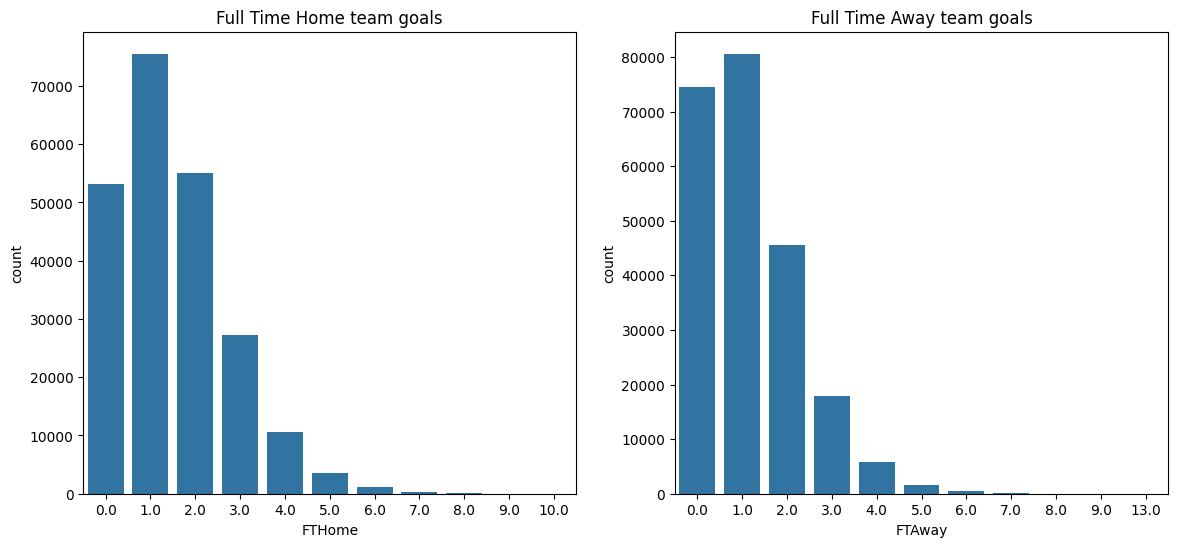

In [40]:
print(matches.FTHome.value_counts())
print(matches.FTAway.value_counts())
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sb.countplot(data=matches, x="FTHome")
plt.title("Full Time Home team goals")
plt.subplot(1,2,2)
sb.countplot(data=matches, x="FTAway")
plt.title("Full Time Away team goals")
plt.show()

observation:

**Home team**

- Teams scored 1 goal in full time in most matches, after that teams scored 2 goals, and in most matches teams did not score any goals.
- teams scored 3 or more goals in few matches.

**Away Team**

- there is slight difference between 0 goal and 1 goal scored by Away teams in most matches.
- teams scored 3 or more goals in few matches.

### Full time results

FTResult
H    101225
A     65369
D     60158
Name: count, dtype: int64


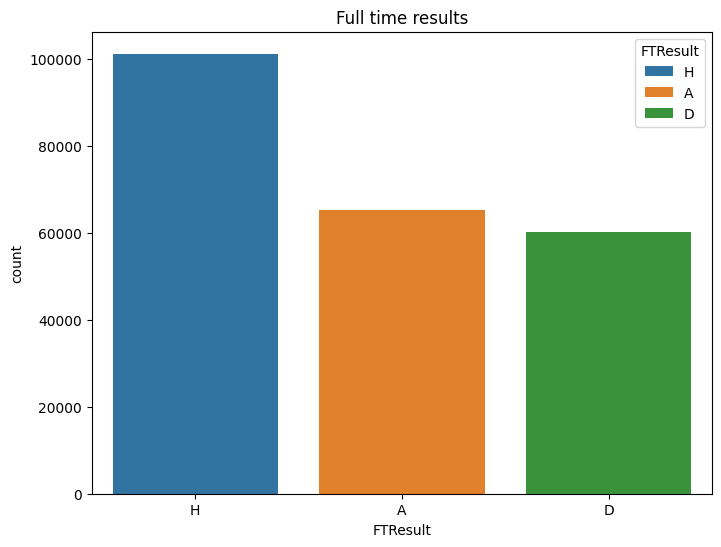

In [41]:
print(matches.FTResult.value_counts())
plt.figure(figsize=(8, 6))
sb.countplot(data=matches, x="FTResult", hue="FTResult")
plt.title("Full time results")
plt.show()

observation:

- Home teams have won the most match according to dataset, it is 101225
- 60,158 matches out of 226,755 ended in a draw, which indicates tough competition.
- **Home teams are the most successful, showing strong performance in their home matches, performing well in half and full time.**

In [42]:
matches.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,F1,2000-07-28,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Yellow Cards
**The columns HomeYellow and Away Yellow contains 49% missing values**

- below is the sum of total yellow cards

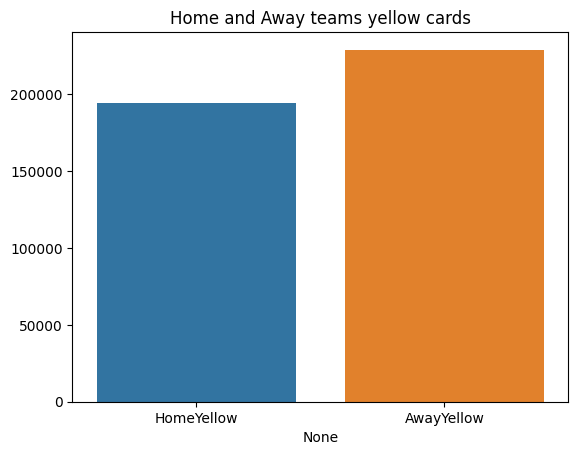

In [43]:
sums = matches[['HomeYellow','AwayYellow']].sum()
sb.barplot(x=sums.index, y=sums.values, hue=sums.index)
plt.title("Home and Away teams yellow cards")
plt.show()

### Red Cards
**The columns HomeRed and AwayRed contains 49% missing values**

- Below is the sum of total red cards

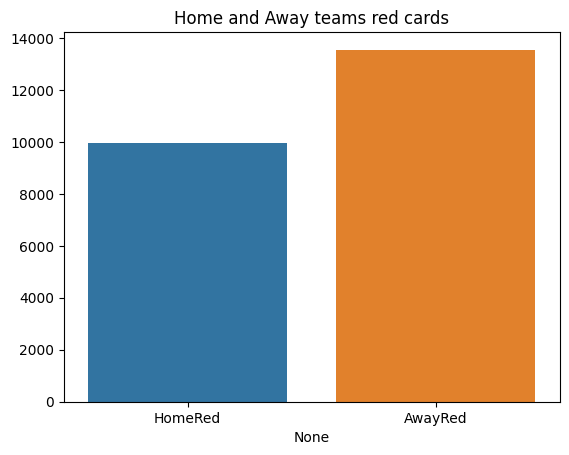

In [44]:
sums2 = matches[['HomeRed','AwayRed']].sum()
sb.barplot(x=sums2.index, y=sums2.values, hue=sums2.index)
plt.title("Home and Away teams red cards")
plt.show()

**In both plots it is clearly visible that Away teams received the most number of cards either yellow or red**

HomeTeam
Arsenal           988.0
Barcelona        1186.0
Bayern Munich    1130.0
Chelsea           945.0
Juventus          923.0
Liverpool         948.0
Man City         1023.0
Man United        949.0
Real Madrid      1190.0
Name: FTHome, dtype: float64


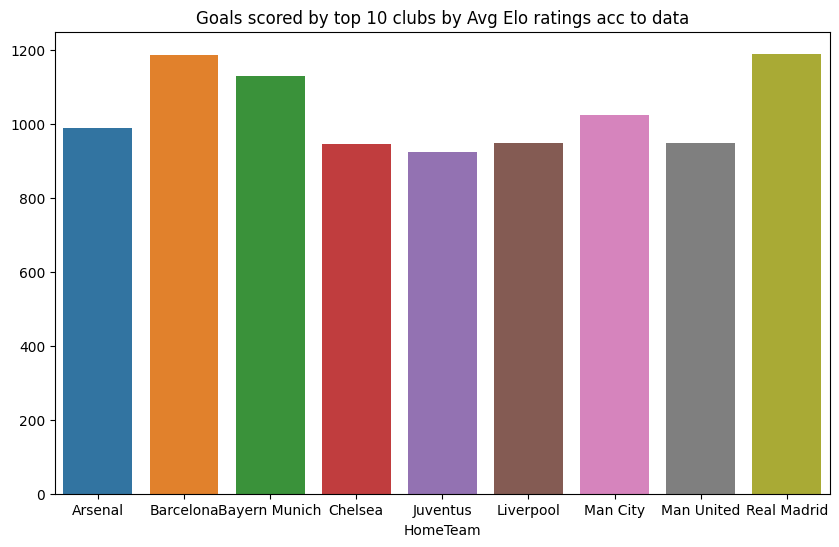

In [45]:
# Goals scored by top 10 clubs with high average Elo ratings in all series
goals_topclubs = matches[matches["HomeTeam"].isin(elo_avg_clubs.club[0:9].tolist())].groupby("HomeTeam")["FTHome"].sum()
print(goals_topclubs)
plt.figure(figsize=(10, 6))
sb.barplot(x=goals_topclubs.index, y=goals_topclubs.values, hue=goals_topclubs.index)
plt.title("Goals scored by top 10 clubs by Avg Elo ratings acc to data")
plt.show()

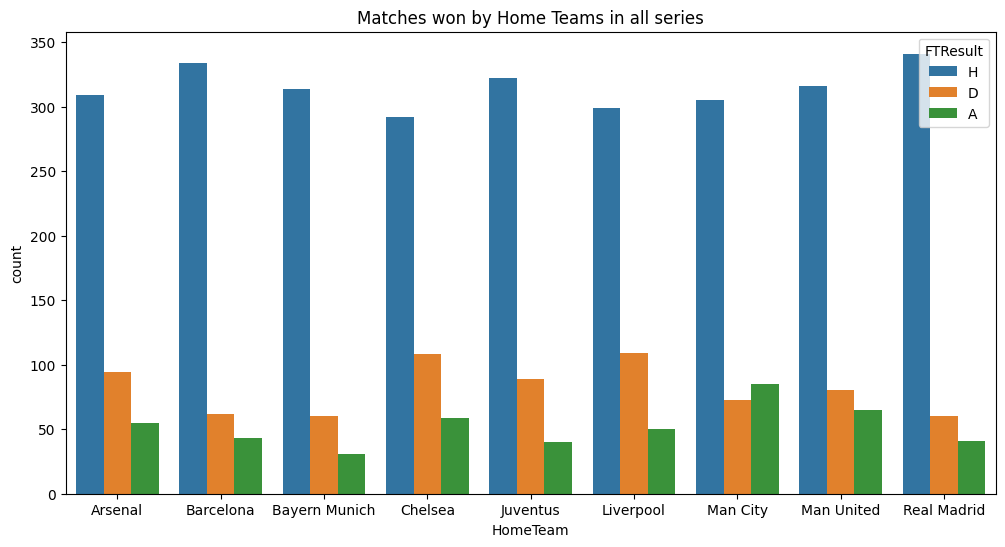

In [46]:
match_result = matches[matches["HomeTeam"].isin(elo_avg_clubs.club[0:9].tolist())].groupby(["HomeTeam"])["FTResult"].value_counts().reset_index()
plt.figure(figsize=(12, 6))
sb.barplot(data=match_result, x="HomeTeam", y="count", hue="FTResult")
plt.title("Matches won by Home Teams in all series")
plt.show()

In [47]:
# Most of the matches are won by home teams 'H' denotes home win

## Feature Engineering

In [48]:
# deleting the columns with more than 50% of missing values

col_del = ['HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners']
matches.drop(columns=col_del, inplace=True)

In [49]:
matches.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeYellow,AwayYellow,HomeRed,AwayRed
0,F1,2000-07-28,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN
1,F1,2000-07-28,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN
2,F2,2000-07-28,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN
3,F2,2000-07-29,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN
4,F2,2000-07-29,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN


In [50]:
matches["Total_goals"] = matches["FTHome"] + matches["FTAway"]
matches.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeYellow,AwayYellow,HomeRed,AwayRed,Total_goals
0,F1,2000-07-28,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,4.0
1,F1,2000-07-28,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,4.0
2,F2,2000-07-28,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,1.0
3,F2,2000-07-29,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,1.0
4,F2,2000-07-29,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,4.0
